# Market Data Exploration

## Objective
Download and explore market data for three ETFs (TLT, GLD, SPY) and VIX volatility index.

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_and_prepare_data

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. Download Market Data
Fetching daily prices from Yahoo Finance for maximum available history.

In [2]:
# Load data using our custom module
data = load_and_prepare_data(save_path='../data/market_data.csv')

Downloaded 5279 trading days from 2004-11-18 to 2025-11-11

Data saved to ../data/market_data.csv
Shape: (5278, 5)

Columns: ['TLT_ret', 'GLD_ret', 'SPY_ret', 'VIX_change', 'VIX']
Downloaded 5279 trading days from 2004-11-18 to 2025-11-11

Data saved to ../data/market_data.csv
Shape: (5278, 5)

Columns: ['TLT_ret', 'GLD_ret', 'SPY_ret', 'VIX_change', 'VIX']


In [3]:
# Quick look at the data
print("Data Summary:")
print(f"Date range: {data.index[0].date()} to {data.index[-1].date()}")
print(f"Total observations: {len(data)}")
print(f"\nFirst few rows:")
data.head(10)

Data Summary:
Date range: 2004-11-19 to 2025-11-11
Total observations: 5278

First few rows:


,TLT_ret,GLD_ret,SPY_ret,VIX_change,VIX
Date,,,,,
2004-11-19,-0.008011,0.008973,-0.011179,0.520000,13.50
2004-11-22,0.005198,0.003789,0.004758,-0.530000,12.97
2004-11-23,0.001239,-0.004459,0.001525,-0.300000,12.67
2004-11-24,0.000000,0.006682,0.002367,0.050000,12.72
2004-11-26,-0.006551,0.005313,-0.000760,0.059999,12.78
2004-11-29,-0.010709,0.002426,-0.004573,0.520000,13.30
2004-11-30,-0.004247,-0.006187,0.000679,-0.060000,13.24
2004-12-01,-0.001561,0.005746,0.011302,-0.270000,12.97
2004-12-02,-0.004056,-0.009521,0.000838,0.009999,12.98


## 2. Descriptive Statistics
Understanding return characteristics of each asset.

In [4]:
# Convert to basis points for easier interpretation
returns_bps = data[['TLT_ret', 'GLD_ret', 'SPY_ret']] * 10000

stats = pd.DataFrame({
    'Mean (bps/day)': returns_bps.mean(),
    'Std Dev (bps/day)': returns_bps.std(),
    'Min': returns_bps.min(),
    'Max': returns_bps.max(),
    'Sharpe (daily)': returns_bps.mean() / returns_bps.std()
})

print("\nReturn Statistics (basis points per day):")
print(stats.round(2))


Return Statistics (basis points per day):
         Mean (bps/day)  Std Dev (bps/day)      Min      Max  Sharpe (daily)
TLT_ret            1.31              92.52  -690.10   725.03            0.01
GLD_ret            4.07             111.30  -919.05  1069.74            0.04
SPY_ret            4.05             120.08 -1158.87  1355.77            0.03


## 3. Visualize ETF Returns Over Time

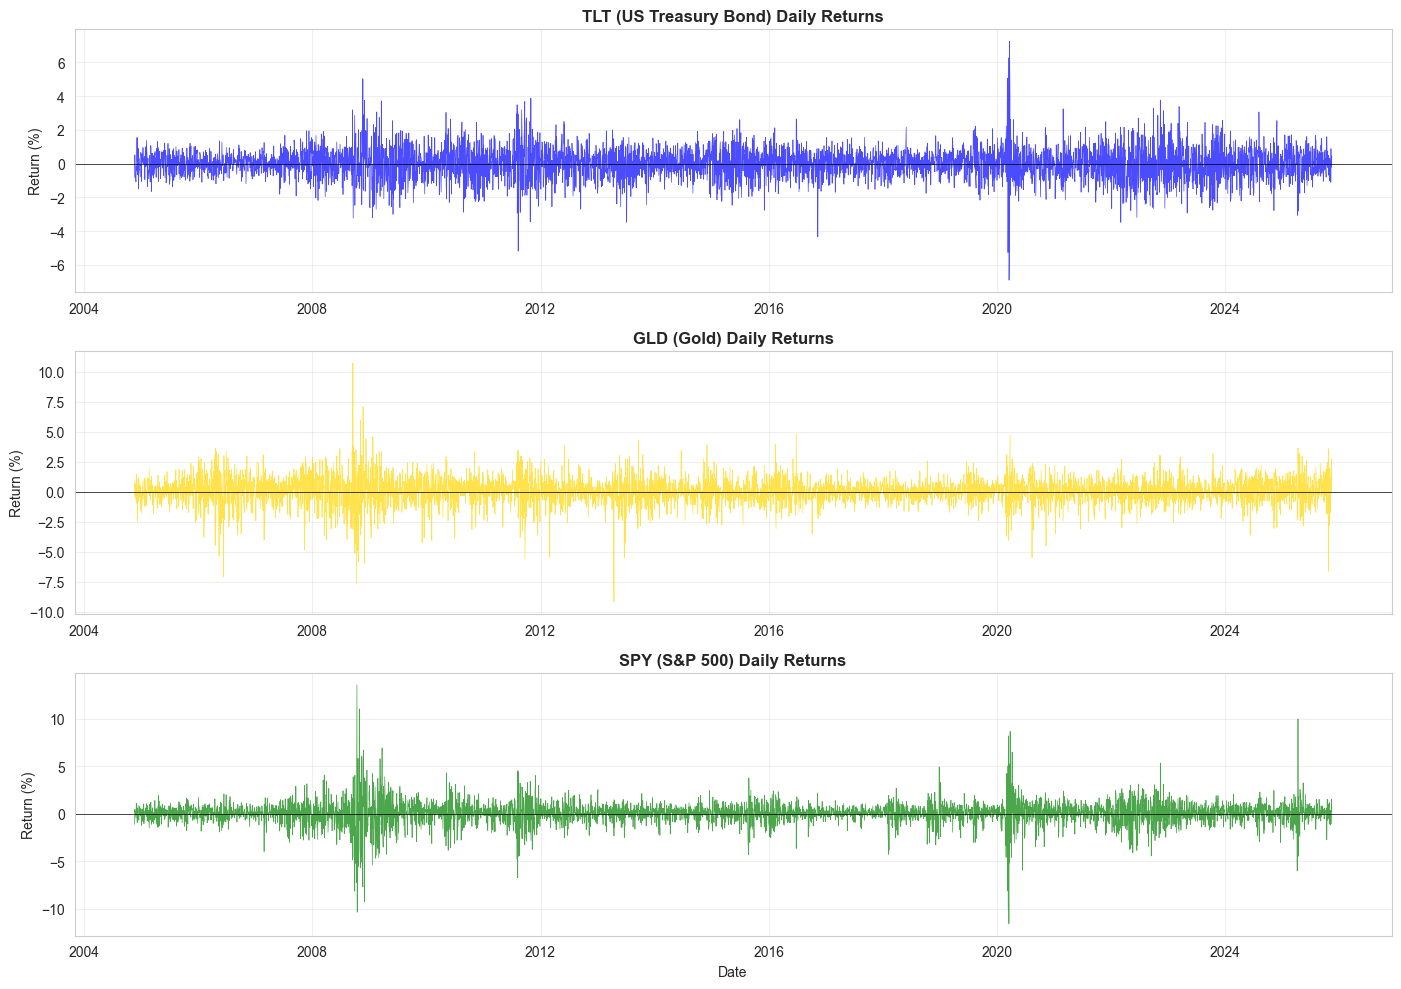

Chart saved to: results/etf_returns_timeseries.png


In [5]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# TLT
axes[0].plot(data.index, data['TLT_ret']*100, color='blue', alpha=0.7, linewidth=0.5)
axes[0].set_title('TLT (US Treasury Bond) Daily Returns', fontweight='bold')
axes[0].set_ylabel('Return (%)')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3)

# GLD
axes[1].plot(data.index, data['GLD_ret']*100, color='gold', alpha=0.7, linewidth=0.5)
axes[1].set_title('GLD (Gold) Daily Returns', fontweight='bold')
axes[1].set_ylabel('Return (%)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)

# SPY
axes[2].plot(data.index, data['SPY_ret']*100, color='green', alpha=0.7, linewidth=0.5)
axes[2].set_title('SPY (S&P 500) Daily Returns', fontweight='bold')
axes[2].set_ylabel('Return (%)')
axes[2].set_xlabel('Date')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/etf_returns_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to: results/etf_returns_timeseries.png")

## 4. VIX Analysis
Understanding volatility dynamics - this drives our regime detection.

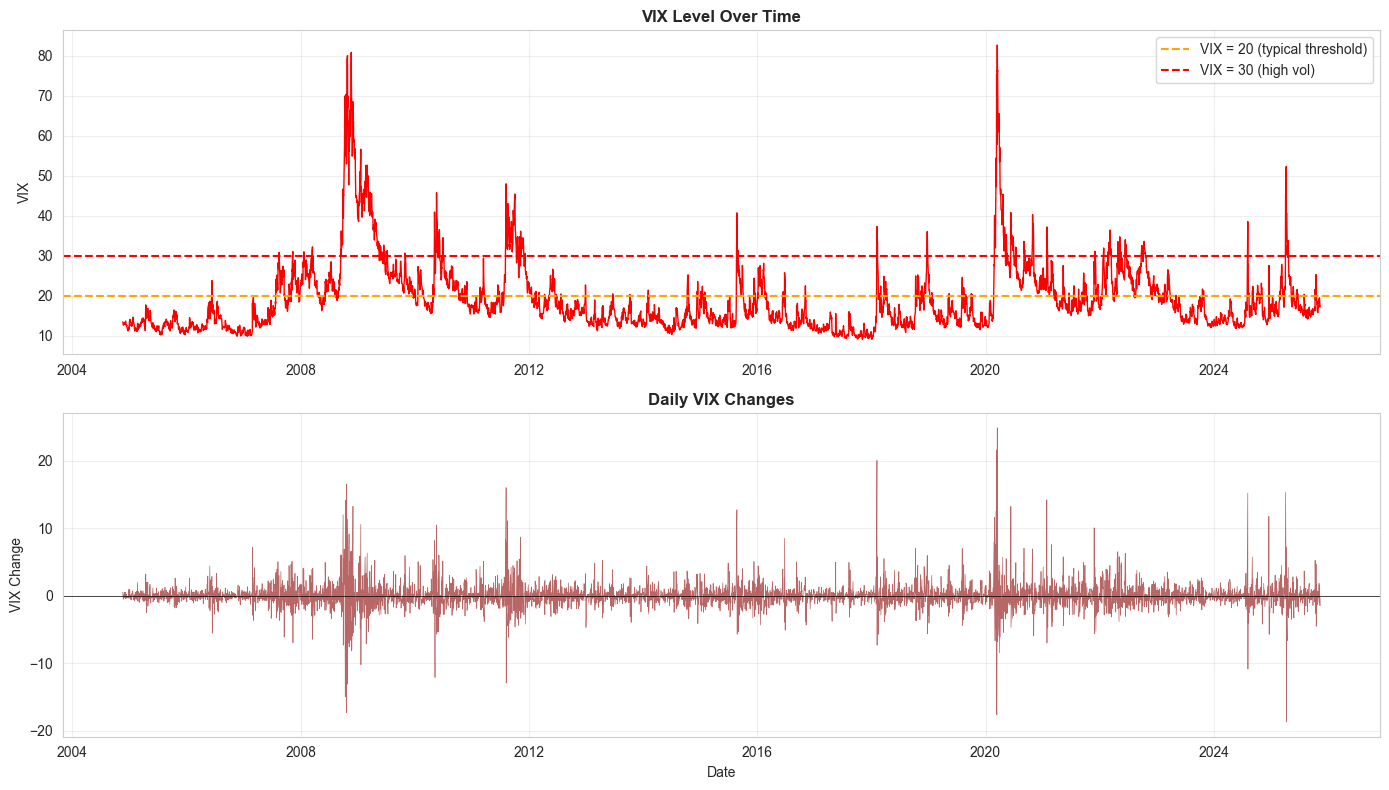

Chart saved to: results/vix_analysis.png


In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# VIX Level
axes[0].plot(data.index, data['VIX'], color='red', linewidth=1)
axes[0].set_title('VIX Level Over Time', fontweight='bold', fontsize=12)
axes[0].set_ylabel('VIX')
axes[0].axhline(y=20, color='orange', linestyle='--', label='VIX = 20 (typical threshold)')
axes[0].axhline(y=30, color='red', linestyle='--', label='VIX = 30 (high vol)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# VIX Changes
axes[1].plot(data.index, data['VIX_change'], color='darkred', alpha=0.6, linewidth=0.5)
axes[1].set_title('Daily VIX Changes', fontweight='bold', fontsize=12)
axes[1].set_ylabel('VIX Change')
axes[1].set_xlabel('Date')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/vix_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to: results/vix_analysis.png")

In [7]:
# VIX statistics
vix_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', '25th Percentile', '75th Percentile'],
    'VIX Level': [
        data['VIX'].mean(),
        data['VIX'].median(),
        data['VIX'].std(),
        data['VIX'].min(),
        data['VIX'].max(),
        data['VIX'].quantile(0.25),
        data['VIX'].quantile(0.75)
    ],
    'VIX Change': [
        data['VIX_change'].mean(),
        data['VIX_change'].median(),
        data['VIX_change'].std(),
        data['VIX_change'].min(),
        data['VIX_change'].max(),
        data['VIX_change'].quantile(0.25),
        data['VIX_change'].quantile(0.75)
    ]
})

print("\nVIX Statistics:")
print(vix_stats.round(2))


VIX Statistics:
            Metric  VIX Level  VIX Change
0             Mean      19.12        0.00
1           Median      16.69       -0.09
2          Std Dev       8.66        1.91
3              Min       9.14      -18.71
4              Max      82.69       24.86
5  25th Percentile      13.41       -0.72
6  75th Percentile      22.09        0.56


## 5. Correlation Analysis
How do assets move together?

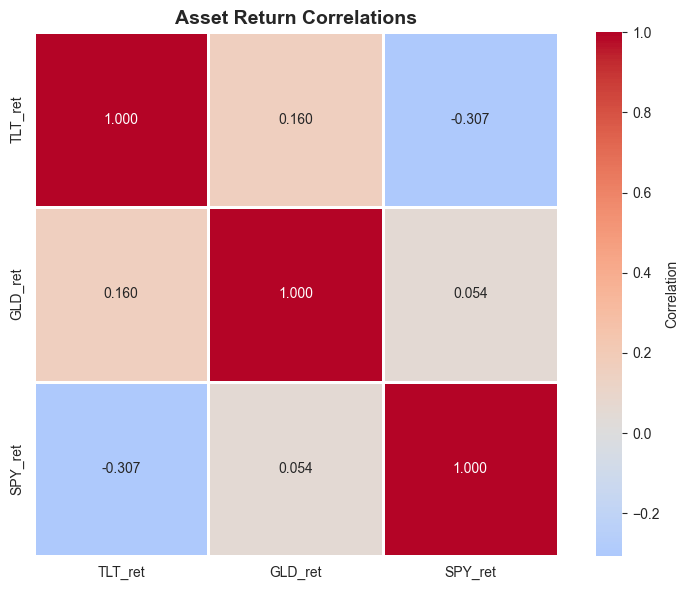


Correlation Matrix:
         TLT_ret  GLD_ret  SPY_ret
TLT_ret    1.000    0.160   -0.307
GLD_ret    0.160    1.000    0.054
SPY_ret   -0.307    0.054    1.000


In [8]:
# Calculate correlation matrix
corr_matrix = data[['TLT_ret', 'GLD_ret', 'SPY_ret']].corr()

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=1,
            cbar_kws={'label': 'Correlation'})
plt.title('Asset Return Correlations', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('../results/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

## Key Observations

1. **Data Coverage:** We have ~20 years of daily data (2004-2024)
2. **VIX Dynamics:** Clear spikes during crisis periods (2008, 2020)
3. **Asset Behavior:** 
   - SPY has highest average returns but also highest volatility
   - TLT shows negative correlation with SPY (diversification benefit)
   - GLD behaves independently
4. **Next Step:** Use VIX changes to identify distinct market regimes